In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, Conv1D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

print(tf.__version__)


2.17.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
cancer = datasets.load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify = y)


In [11]:

X_train.shape


(455, 30)

In [12]:
X_test.shape

(114, 30)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)
X_train.shape

(455, 30, 1)

In [15]:
X_test.shape

(114, 30, 1)

In [16]:
epochs = 50
model = Sequential()

In [17]:
from tensorflow.keras.layers import Dropout, BatchNormalization, InputLayer, Conv1D, Dense, Flatten


In [18]:
model.add(Conv1D(filters=32, kernel_size = 2, activation='relu', input_shape=(30,1)))

model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size = 2, activation='relu'))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         114,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,073 (465.13 KB)

 Trainable params: 119,073 (465.13 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
history  =model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5419 - loss: 0.7015 - val_accuracy: 0.6316 - val_loss: 0.6458
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6606 - loss: 0.6568 - val_accuracy: 0.7281 - val_loss: 0.6132
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6939 - loss: 0.6329 - val_accuracy: 0.8421 - val_loss: 0.5817
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7589 - loss: 0.5929 - val_accuracy: 0.8947 - val_loss: 0.5512
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7892 - loss: 0.5668 - val_accuracy: 0.8947 - val_loss: 0.5200
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8226 - loss: 0.5295 - val_accuracy: 0.9035 - val_loss: 0.4883
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8501 - loss: 0.5050 - val_accuracy: 0.9123 - val_loss: 0.4569
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8555 - loss: 0.4828 - val_accuracy: 0.9211 - val_l

In [28]:
def plot_learningCurve(history, epoch):
  #Plot training and validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()


In [29]:

history.history


{'accuracy': [0.5692307949066162,
  0.6791208982467651,
  0.7076923251152039,
  0.7560439705848694,
  0.797802209854126,
  0.8131868243217468,
  0.8461538553237915,
  0.8681318759918213,
  0.898901104927063,
  0.8879120945930481,
  0.9142857193946838,
  0.9230769276618958,
  0.9296703338623047,
  0.9296703338623047,
  0.9296703338623047,
  0.9340659379959106,
  0.9296703338623047,
  0.9472527503967285,
  0.9406593441963196,
  0.9340659379959106,
  0.9494505524635315,
  0.9472527503967285,
  0.9428571462631226,
  0.9516483545303345,
  0.9472527503967285,
  0.9582417607307434,
  0.9582417607307434,
  0.9538461565971375,
  0.9472527503967285,
  0.9648351669311523,
  0.9604395627975464,
  0.9428571462631226,
  0.9516483545303345,
  0.9560439586639404,
  0.9582417607307434,
  0.9648351669311523,
  0.9692307710647583,
  0.9604395627975464,
  0.9736263751983643,
  0.9516483545303345,
  0.9714285731315613,
  0.9714285731315613,
  0.9626373648643494,
  0.9648351669311523,
  0.9648351669311523,


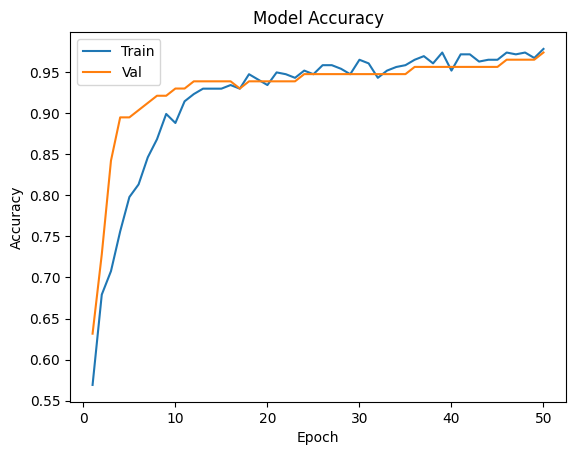

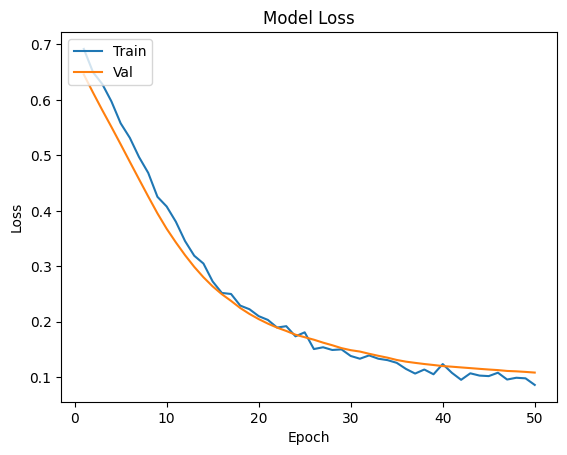

In [30]:
plot_learningCurve(history, epochs)


In [32]:
import pickle

with open('test1.pickle', 'wb') as model_file:
    pickle.dump(model, model_file)

In [33]:
from google.colab import files

# Download the saved model
files.download('test1.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>